In [ ]:
import os
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression


In [ ]:
df=pd.read_csv('meandepth-inbreeding.csv')

In [ ]:
df=df[['Unnamed: 0','F','meandepth','KB']]
df.set_index('Unnamed: 0', inplace=True)
df.index.name=None

In [ ]:
x=df[['meandepth']]
yROH=df[['KB']]
yInbreeding=df['F']

In [ ]:
regInbreeding = linear_model.LinearRegression()
regInbreeding.fit(x,yInbreeding)

LinearRegression()

In [ ]:
ypredInbreeding=regInbreeding.predict(x)
residualsInbreeding=yInbreeding-ypredInbreeding
df['Inbreeding residuals']=residualsInbreeding

<ipython-input-8-4ed8b50cfc97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inbreeding residuals']=residualsInbreeding


In [ ]:
regROH = linear_model.LinearRegression()
regROH.fit(x,yROH)

LinearRegression()

In [ ]:
ypredROH=regROH.predict(x)
residualsROH=yROH-ypredROH
df['ROH residuals']=residualsROH

In [ ]:
dogdf=pd.read_excel('dog_details.xlsx')

In [ ]:
dogdf.dropna(subset=['kraken'],inplace=True)
dogdf.set_index('SAMPLE NO.',inplace=True)

In [ ]:
dogdf.index.name=None
dogdf=dogdf['BREED']

In [ ]:
df['breed']=dogdf

In [ ]:
df

,F,meandepth,KB,Inbreeding residuals,ROH residuals,breed
102,0.431200,0.135432,2124370.0,0.227804,99886.081614,Bullmastiff
100,-0.091090,0.187589,1764250.0,-0.135739,-37941.269522,Beagle Mix
104,0.332700,0.150493,2092890.0,0.175145,132597.494962,Irish Wolfhound
106,-0.011340,0.262116,1708640.0,0.170843,224080.377814,St Bernard
108,-0.433100,0.353714,1076670.0,0.027871,-17504.180256,Miniature Schnauzer
...,...,...,...,...,...,...
96,0.113300,0.230171,1878060.0,0.198253,257349.860964,Irish Wolfhound
92,0.006494,0.313049,1563160.0,0.343696,295673.877634,golden retriever/chesapeake bay retriver
95,0.365500,0.174155,2061910.0,0.279963,202464.362757,Irish Wolfhound
88,-0.186600,0.243325,1534660.0,-0.061610,-29985.731616,"Dachshund, wirehaired (miniature)"


In [ ]:
#regdf.to_csv('inbreeding-residuals by breed.csv')

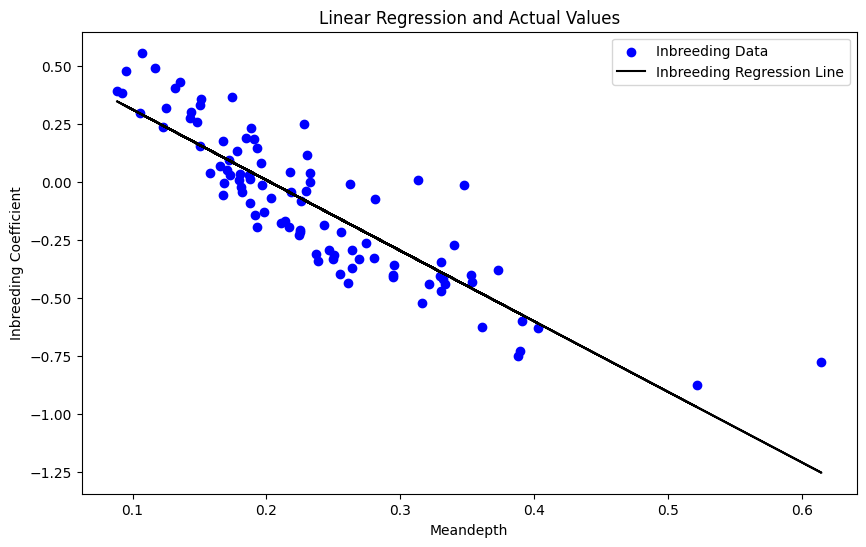

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, yInbreeding, color='blue', label='Inbreeding Data')
plt.plot(x, ypredInbreeding, color='black', label='Inbreeding Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('Inbreeding Coefficient')
plt.title('Linear Regression and Actual Values')
plt.legend()
plt.show()

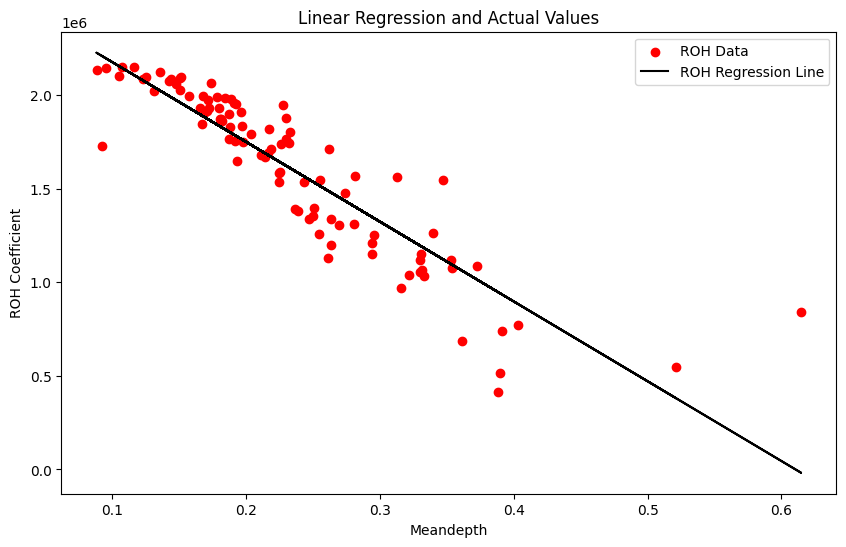

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, yROH, color='red', label='ROH Data')
plt.plot(x, ypredROH, color='black', label='ROH Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('ROH Coefficient')
plt.title('Linear Regression and Actual Values')
plt.legend()
plt.show()

In [ ]:
df

,F,meandepth,KB,Inbreeding residuals,ROH residuals,breed
102,0.431200,0.135432,2124370.0,0.227804,99886.081614,Bullmastiff
100,-0.091090,0.187589,1764250.0,-0.135739,-37941.269522,Beagle Mix
104,0.332700,0.150493,2092890.0,0.175145,132597.494962,Irish Wolfhound
106,-0.011340,0.262116,1708640.0,0.170843,224080.377814,St Bernard
108,-0.433100,0.353714,1076670.0,0.027871,-17504.180256,Miniature Schnauzer
...,...,...,...,...,...,...
96,0.113300,0.230171,1878060.0,0.198253,257349.860964,Irish Wolfhound
92,0.006494,0.313049,1563160.0,0.343696,295673.877634,golden retriever/chesapeake bay retriver
95,0.365500,0.174155,2061910.0,0.279963,202464.362757,Irish Wolfhound
88,-0.186600,0.243325,1534660.0,-0.061610,-29985.731616,"Dachshund, wirehaired (miniature)"


In [ ]:
Inbreedingdf=(df.sort_values(by='Inbreeding residuals',ascending=False,inplace=False))[['F','meandepth','Inbreeding residuals','breed']]
#Inbreedingdf.to_csv('inbreeding-residuals.csv')
ROHdf=(df.sort_values(by='ROH residuals',ascending=False,inplace=False))[['F','KB','ROH residuals','breed']]
#ROHdf.to_csv('ROH-residuals.csv')

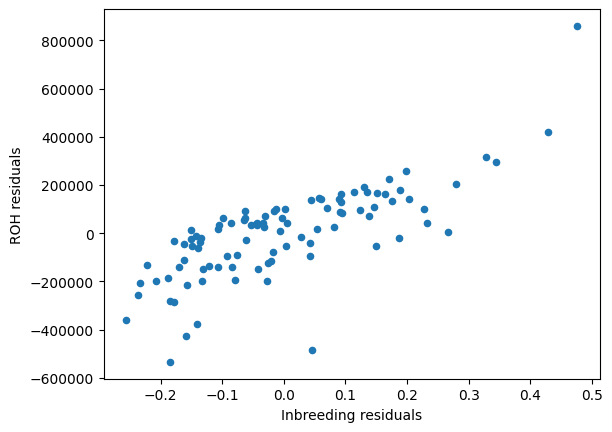

In [ ]:
df.plot.scatter(x='Inbreeding residuals',y='ROH residuals')
